# Supervised Modeling

In [17]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode

from io import StringIO
import requests
import json
import pandas as pd

import random

In [33]:
years = ["2015", "2016", "2017"]

dframes_acc = []
dframes_veh = []

for year in years:
    df_accidents = pd.read_csv("Data/"+year+"/ACCIDENT.csv")
    df_vehicles = pd.read_csv("Data/"+year+"/VEHICLE.csv")
    dframes_acc.append(df_accidents)
    dframes_veh.append(df_vehicles)

df_vehicles = pd.concat(dframes_veh).sample(frac=1)
df_accidents = pd.concat(dframes_acc).sample(frac=1)
    
#Find blank or whitespace
df_vehicles = df_vehicles.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)

#Find blank or whitespace
df_accidents = df_accidents.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)

c:\users\mulic\.virtualenvs\mscs-project-hxj6hwao\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [34]:
vehiclesToKeep = ["ST_CASE", "MAKE", "MODEL", "MOD_YEAR"]
df_vehicles_copy = df_vehicles[vehiclesToKeep]


#How many unique values?
for column in df_vehicles_copy:
    print(column, len(df_vehicles_copy[column].unique()))
    
# df_vehicles_copy["MAKE"] = df_vehicles_copy["MAKE"].replace(99, )

ST_CASE 36260
MAKE 71
MODEL 135
MOD_YEAR 92


In [35]:
accidentsToKeep = ["STATE", "ST_CASE", "FATALS"]
df_accidents_copy = df_accidents[accidentsToKeep]


#How many unique values?
for column in df_accidents_copy:
    print(column, len(df_accidents_copy[column].unique()))

STATE 51
ST_CASE 36281
FATALS 10


In [36]:
df_merge = pd.merge(df_accidents_copy, df_vehicles_copy, on="ST_CASE")

In [37]:
len(df_merge)

447731

In [38]:
df_merge['MULTI_FATAL'] = np.where(df_merge['FATALS']>1, 1, 0)

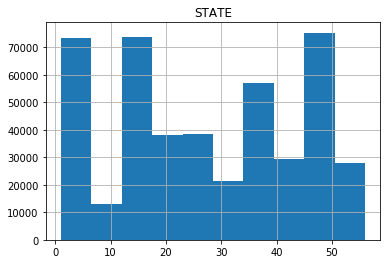

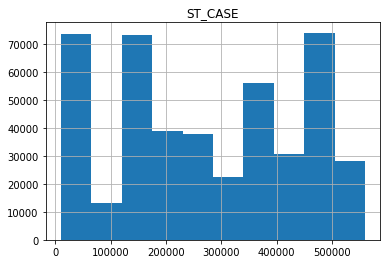

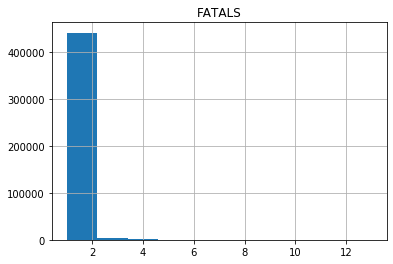

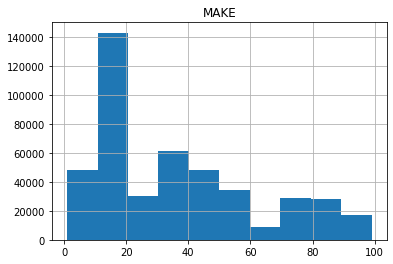

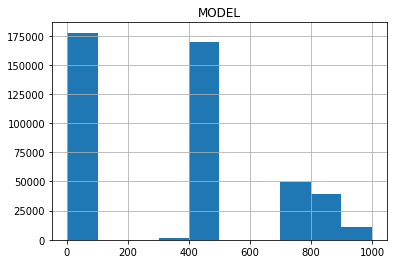

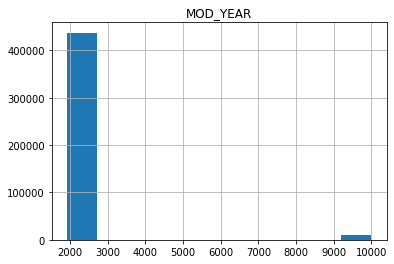

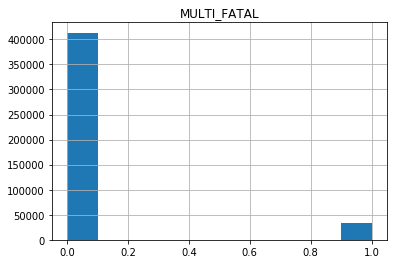

In [39]:
#Lets look at a historgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df_merge:
    df_merge.hist(column=col)

In [40]:
df_merge.astype({'STATE':'str', 'ST_CASE':'str', 'MAKE':'str', 'MODEL':'str'}).dtypes

STATE          object
ST_CASE        object
FATALS          int64
MAKE           object
MODEL          object
MOD_YEAR        int64
MULTI_FATAL     int32
dtype: object

In [41]:
df_merge_1fatal = df_merge.loc[df_merge['MULTI_FATAL'] == False]
print(len(df_merge_1fatal))
df_merge_Nfatal = df_merge.loc[df_merge['MULTI_FATAL'] == True]
print(len(df_merge_Nfatal))

df_merge_1fatal_sample = df_merge_1fatal.sample(n=3*len(df_merge_Nfatal), replace=False)
print(len(df_merge_1fatal_sample))

413295
34436
103308


In [42]:
df_merge_1fatal_sample_rebrand = df_merge_1fatal_sample.copy()
df_merge_1fatal_sample_rebrand['MULTI_FATAL'] = False

df_merge_Nfatal_rebrand = df_merge_Nfatal.copy()
df_merge_Nfatal_rebrand['MULTI_FATAL'] = True

frames = [df_merge_Nfatal_rebrand, df_merge_1fatal_sample_rebrand]

df_merge_concat = pd.concat(frames).sample(frac=1)
print(df_merge_concat.head())
print(len(df_merge_concat))

        STATE  ST_CASE  FATALS  MAKE  MODEL  MOD_YEAR  MULTI_FATAL
187429     51   510482       1    55    401      2017        False
164337     55   550290       1     2    405      2004        False
434247     25   250209       1    34     35      1998        False
247000     12   120964       1    37     31      2008        False
18360      29   290720       1     7    442      2003        False
137744


In [ ]:
## Address the 9999 unknown values

In [43]:
# - https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Try and use an SVM# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_merge_concat[['MAKE', 'MODEL', 'MOD_YEAR']]  # Features
y=df_merge_concat['MULTI_FATAL']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[30728   339]
 [10155   102]]
              precision    recall  f1-score   support

       False       0.75      0.99      0.85     31067
        True       0.23      0.01      0.02     10257

    accuracy                           0.75     41324
   macro avg       0.49      0.50      0.44     41324
weighted avg       0.62      0.75      0.65     41324

Accuracy: 0.746055560933114


In [45]:
###    Today: Work on SVM
###    Change year to num again ---------
###    Deal with 9999 unknowns


In [46]:
# - https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Try and use an SVM# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_merge_concat[['MAKE', 'MODEL', 'MOD_YEAR']]  # Features
y=df_merge_concat['MULTI_FATAL']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 80% training and 20% test

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#Train the model using the training sets y_pred=clf.predict(X_test)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[20435   186]
 [ 6865    63]]
              precision    recall  f1-score   support

       False       0.75      0.99      0.85     20621
        True       0.25      0.01      0.02      6928

    accuracy                           0.74     27549
   macro avg       0.50      0.50      0.44     27549
weighted avg       0.62      0.74      0.64     27549

Accuracy: 0.7440560455914915
